IMPORT LIBRARY

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

1. DATA LOADING

In [ ]:
dataset = pd.read_csv('Crop_recommendation.csv')
df = pd.DataFrame(dataset)
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


2. MENGECEK MISSING VALUE DAN DUPLICATE DATA

In [ ]:
# Mengecek missing value
print("=== Mengecek Missing Value ===")
print(df.isnull().sum())  # Jumlah missing value di setiap kolom
print("\nApakah ada missing value? ", df.isnull().values.any())

# Mengecek data duplikat
print("\n=== Mengecek Duplicate Data ===")
print("Jumlah baris duplikat:", df.duplicated().sum())  # Jumlah baris yang duplikat
print("\nApakah ada data duplikat? ", df.duplicated().any())

=== Mengecek Missing Value ===
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Apakah ada missing value?  False

=== Mengecek Duplicate Data ===
Jumlah baris duplikat: 0

Apakah ada data duplikat?  False


3. PENANGANAN OUTLIER



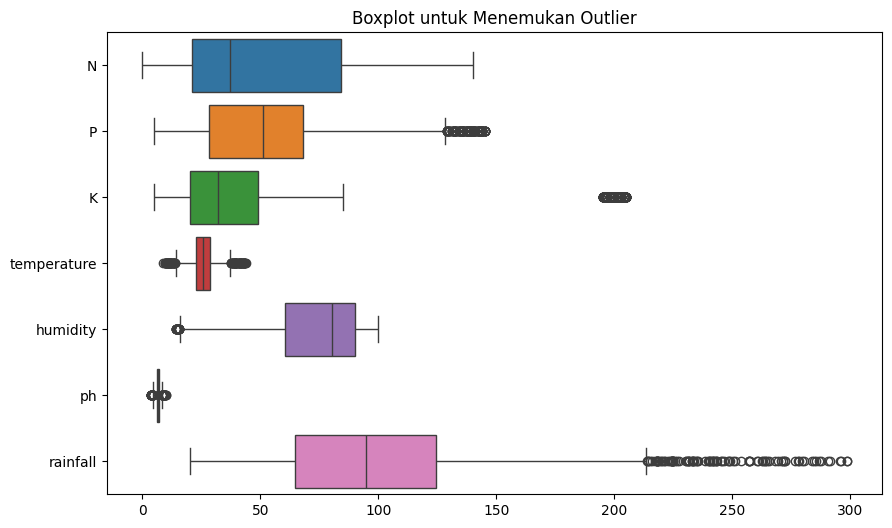

<Figure size 1000x600 with 0 Axes>

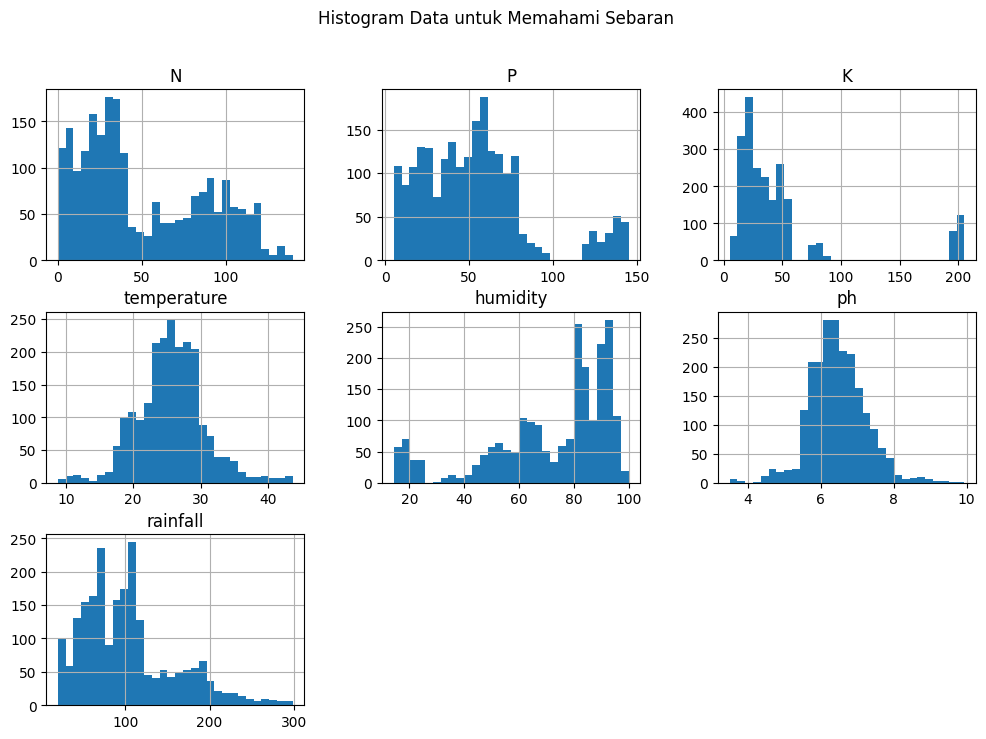

In [ ]:
# Menampilkan boxplot untuk setiap kolom numerik
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient='h')
plt.title("Boxplot untuk Menemukan Outlier")
plt.show()

# Menampilkan histogram untuk kolom numerik tertentu
plt.figure(figsize=(10, 6))
df.hist(bins=30, figsize=(12, 8))
plt.suptitle("Histogram Data untuk Memahami Sebaran")
plt.show()

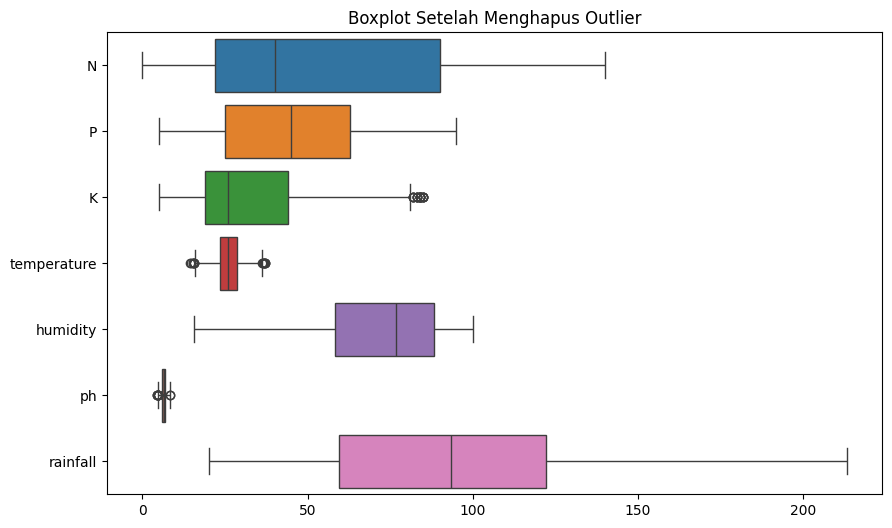

<Figure size 1000x600 with 0 Axes>

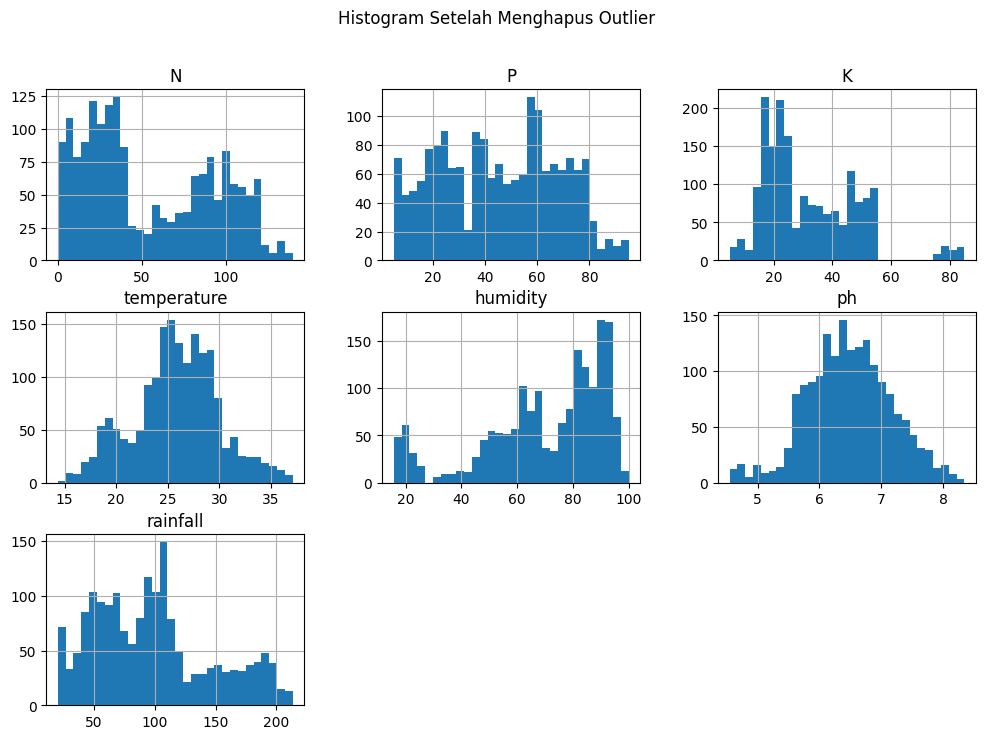

In [ ]:
# Memilih hanya kolom numerik dari dataframe
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Menghitung IQR hanya untuk kolom numerik
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menyaring data untuk menghapus outlier
df_cleaned = df_numeric[~((df_numeric < lower_bound) | (df_numeric > upper_bound)).any(axis=1)]

# Menampilkan boxplot setelah menghapus outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, orient='h')
plt.title("Boxplot Setelah Menghapus Outlier")
plt.show()

# Menampilkan histogram setelah menghapus outlier
plt.figure(figsize=(10, 6))
df_cleaned.hist(bins=30, figsize=(12, 8))
plt.suptitle("Histogram Setelah Menghapus Outlier")
plt.show()

4. NORMALISASI/STANDARDISASI

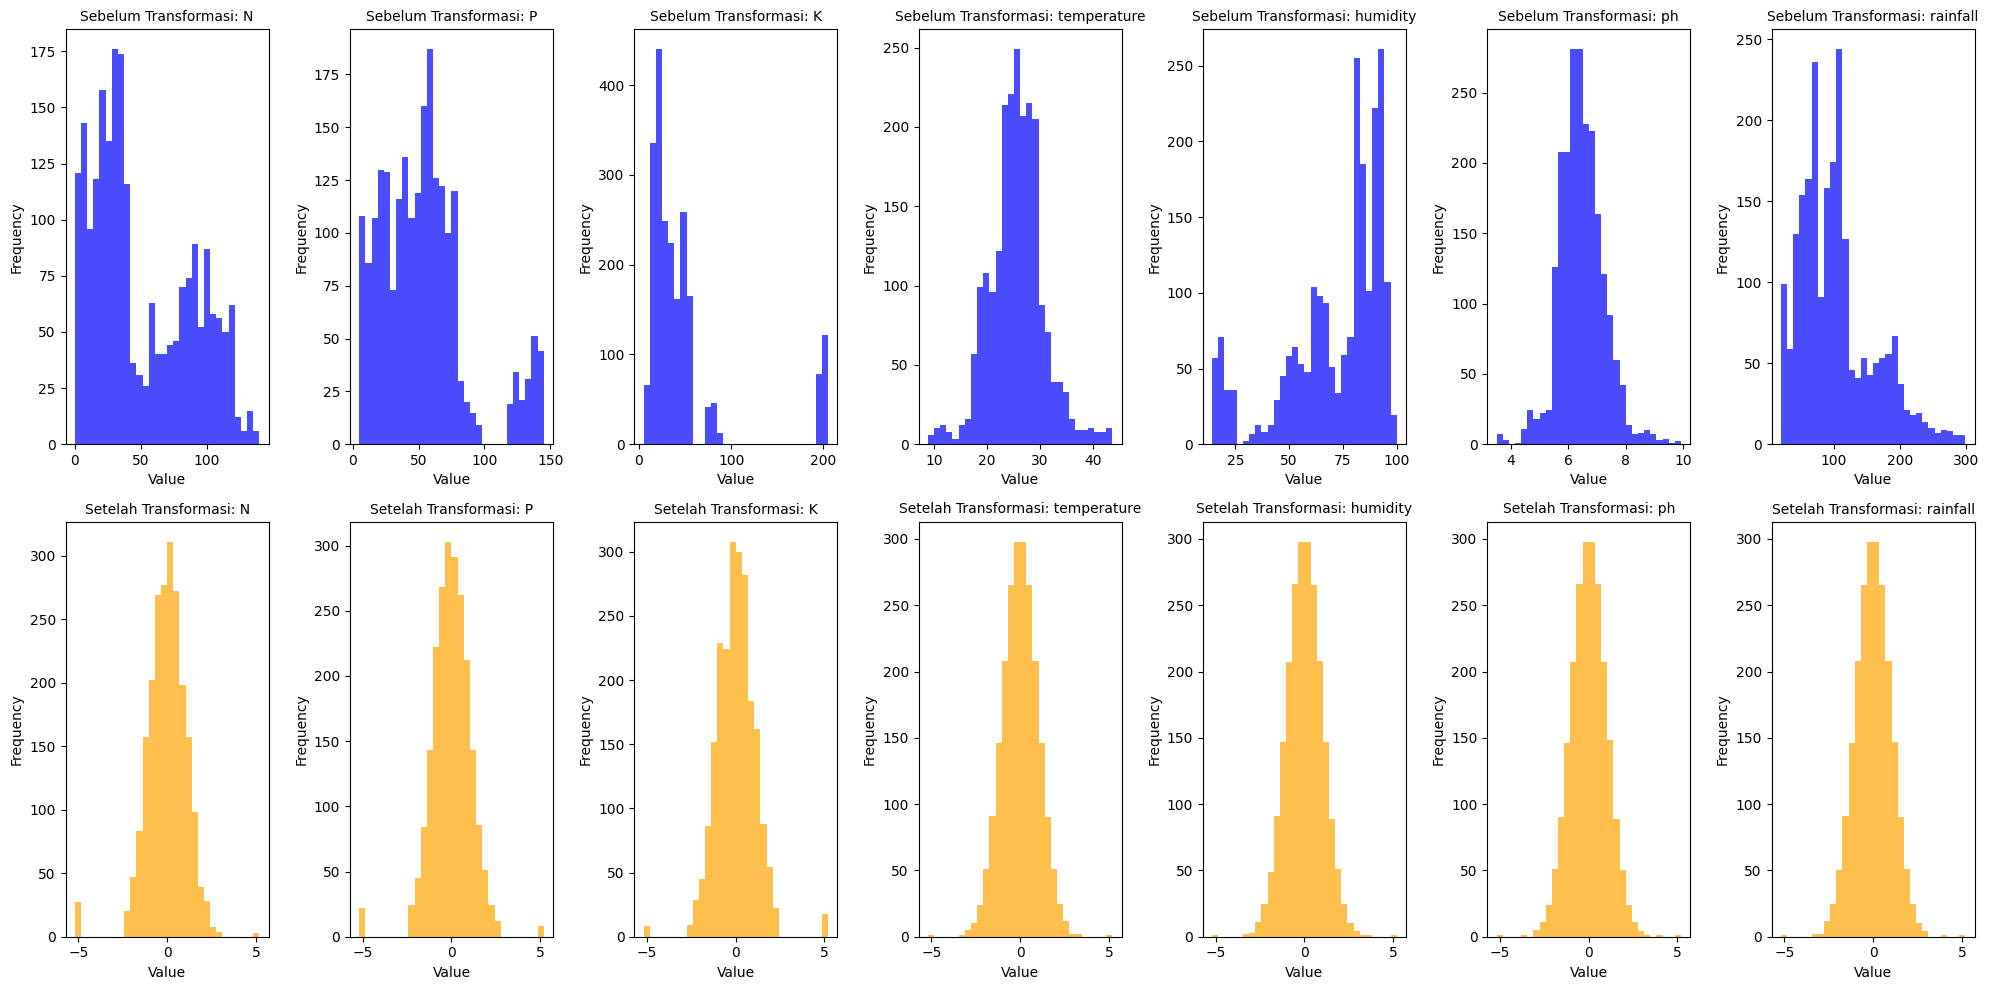

In [ ]:
# Memilih kolom numerik
numerical_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
original_data = df[numerical_columns]

# Menerapkan Quantile Transformation
qt = QuantileTransformer(output_distribution='normal', random_state=0)
adjusted_data = pd.DataFrame(qt.fit_transform(original_data), columns=numerical_columns)

# Visualisasi dalam bentuk grid
fig, axes = plt.subplots(2, len(numerical_columns), figsize=(20, 10))

# Sebelum transformasi
for i, column in enumerate(numerical_columns):
    axes[0, i].hist(original_data[column], bins=30, color='blue', alpha=0.7)
    axes[0, i].set_title(f'Sebelum Transformasi: {column}', fontsize=10)
    axes[0, i].set_xlabel('Value')
    axes[0, i].set_ylabel('Frequency')

# Setelah transformasi
for i, column in enumerate(numerical_columns):
    axes[1, i].hist(adjusted_data[column], bins=30, color='orange', alpha=0.7)
    axes[1, i].set_title(f'Setelah Transformasi: {column}', fontsize=10)
    axes[1, i].set_xlabel('Value')
    axes[1, i].set_ylabel('Frequency')

# Atur layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()

5. ENCODING

In [ ]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Menampilkan label yang terubah
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

# Menampilkan DataFrame
df

{'apple': 0, 'banana': 1, 'blackgram': 2, 'chickpea': 3, 'coconut': 4, 'coffee': 5, 'cotton': 6, 'grapes': 7, 'jute': 8, 'kidneybeans': 9, 'lentil': 10, 'maize': 11, 'mango': 12, 'mothbeans': 13, 'mungbean': 14, 'muskmelon': 15, 'orange': 16, 'papaya': 17, 'pigeonpeas': 18, 'pomegranate': 19, 'rice': 20, 'watermelon': 21}


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


6. DATA SPLIT

In [ ]:
X = df.drop(columns=['label'])
y = df['label']

# Membagi dataset menjadi data latih dan data uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

7. PEMBANGUNAN MODEL

In [ ]:
# Membuat model Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model

RandomForestRegressor(random_state=42)

In [ ]:
# Melatih model dengan data latih
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Membuat prediksi pada data uji
y_pred = model.predict(X_test)

8. EVALUASI

In [ ]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared

# Menampilkan hasil evaluasi
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 2.3984004545454547
Root Mean Squared Error (RMSE): 1.5486770013613087
R-squared (R²): 0.9433322709997705


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


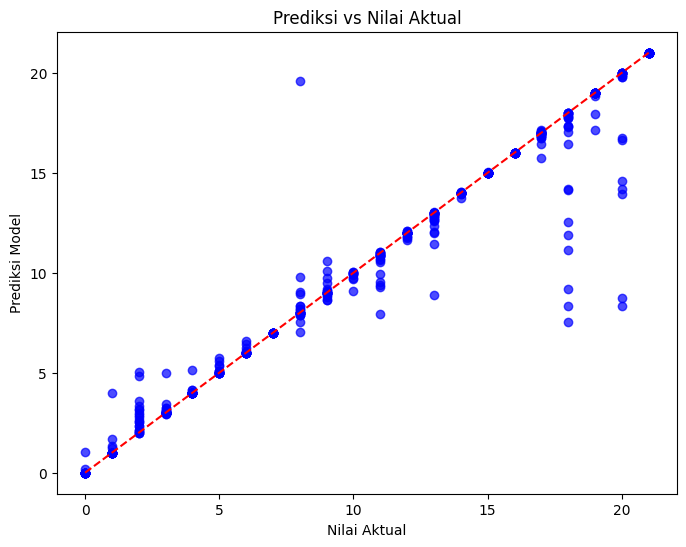

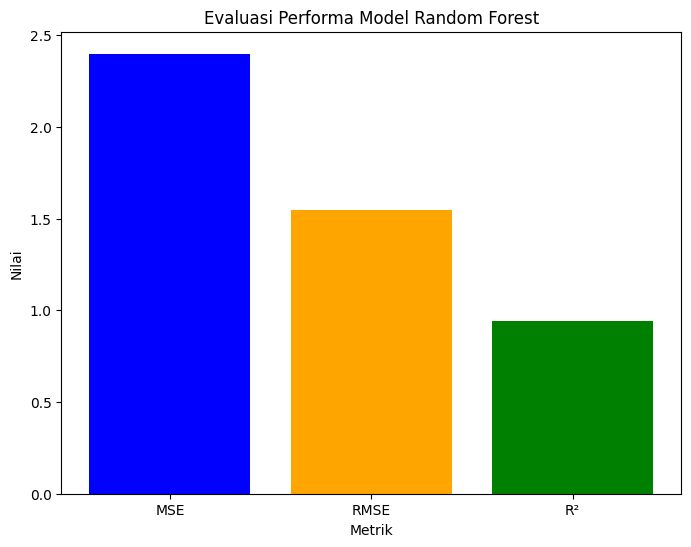

  Metrik     Nilai
0    MSE  2.398400
1   RMSE  1.548677
2     R²  0.943332


In [ ]:
# Visualisasi Hasil Prediksi vs Nilai Aktual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Prediksi vs Nilai Aktual")
plt.xlabel("Nilai Aktual")
plt.ylabel("Prediksi Model")
plt.show()

# Visualisasi Performa Model dalam bentuk bar chart
performance_metrics = ['MSE', 'RMSE', 'R²']
values = [mse, rmse, r2]

plt.figure(figsize=(8, 6))
plt.bar(performance_metrics, values, color=['blue', 'orange', 'green'])
plt.title("Evaluasi Performa Model Random Forest")
plt.xlabel("Metrik")
plt.ylabel("Nilai")
plt.show()

# Tabel Performa Model
performance_df = pd.DataFrame({
    'Metrik': ['MSE', 'RMSE', 'R²'],
    'Nilai': [mse, rmse, r2]
})

print(performance_df)

In [ ]:
new_data = pd.DataFrame({
    'N': [80],         # Nitrogen
    'P': [70],         # Phosphorus
    'K': [34],         # Potassium
    'temperature': [37],  # Temperature
    'humidity': [77],    # Humidity
    'ph': [7],        # pH
    'rainfall': [180]    # Rainfall
})

# Melakukan prediksi pada data baru
new_prediction = model.predict(new_data)

# Mengonversi prediksi label numerik menjadi nama tanaman
predicted_label = int(new_prediction[0])  # Mengambil hasil prediksi pertama
predicted_crop = label_encoder.inverse_transform([predicted_label])[0]  # Menyandikan label ke nama tanaman

print("\nPrediksi untuk Data Baru:")
print(f"Prediksi label untuk data baru: {new_prediction[0]:.2f} ({predicted_crop})")


Prediksi untuk Data Baru:
Prediksi label untuk data baru: 11.89 (maize)
